<h1>Importing Libraries & Data Loading</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autism_data = pd.read_csv("Toddler Autism dataset July 2018.csv")

<h2>Data Preprocessing</h2>

In [3]:
autism_data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
autism_data.tail()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No
1053,1054,1,1,0,0,1,1,0,1,1,0,24,6,m,asian,yes,yes,family member,Yes


In [5]:
autism_data.shape

(1054, 19)

In [6]:
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

<h3>Problem Statement: Predicting Autism in Toddlers</h3>


The objective of this project is to develop a predictive model that can accurately determine whether a toddler has autism or not based on various features such as screening question results, age, gender, family history, and other demographic information.

This Dataset has total 1054 cases of toddlers. We have a case number, ten two-choice questions, age, and a Qchat score based on the test given. These will have top priority in consideration for being used in machine learning algorithms. We also have sex, ethnicity, jaundice, family member with ASD, who completed the test, and class. Only class will be considered for the sake of simplifying the problem, since it represents each actual result for the test given.

Attribute Information :

| Attribute             | Description                                     |
|-----------------------|-------------------------------------------------|
| Case_No               | Unique ID for each toddler                      |
| A1                    | Result of autistic screening question 1         |
| A2                    | Result of autistic screening question 2         |
| A3 to A10             | Results of other screening questions            |
| Age_Mons              | Age of the toddler in months                    |
| Qchat_10 Score        | Total score of the screening questions          |
| Sex                   | Gender of the toddler                           |
| Ethnicity             | Place the toddler belongs to                    |
| Jaundice              | Whether the toddler had jaundice or not         |
| Family_mem_with_ASD   | Whether any family member has ASD or not        |
| Who completed the test| Person who completed the screening test         |
| Class/ASD Traits      | Whether the toddler has autism or not (1 for Yes, 0 for No) |


In [7]:
autism_data.nunique()

Case_No                   1054
A1                           2
A2                           2
A3                           2
A4                           2
A5                           2
A6                           2
A7                           2
A8                           2
A9                           2
A10                          2
Age_Mons                    25
Qchat-10-Score              11
Sex                          2
Ethnicity                   11
Jaundice                     2
Family_mem_with_ASD          2
Who completed the test       5
Class/ASD Traits             2
dtype: int64

In [8]:
autism_data.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

<Axes: >

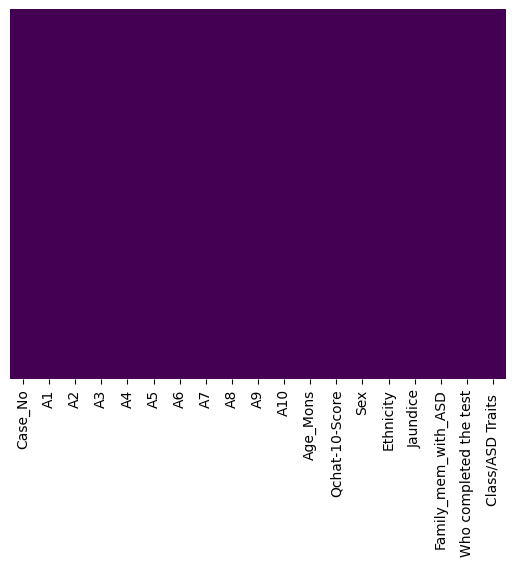

In [9]:
# Visualizing the missing data
sns.heatmap(autism_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
autism_data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [11]:
list(autism_data.columns)

['Case_No',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Age_Mons',
 'Qchat-10-Score',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who completed the test',
 'Class/ASD Traits ']

#### Classification of Dataset based on Categorical and Numerical Values.

In [12]:
cat_cols=autism_data.select_dtypes(include=['object']).columns.tolist()
num_cols = autism_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print()
print(cat_cols)
print()
print("Numerical Variables:")
print()
print(num_cols)

Categorical Variables:

['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ']

Numerical Variables:

['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score']


In [13]:
autism_data.columns.tolist()

['Case_No',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'Age_Mons',
 'Qchat-10-Score',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who completed the test',
 'Class/ASD Traits ']

<h2>Exploratory Data Analysis</h2>

In [14]:
autism_data['Case_No'].value_counts()

Case_No
1       1
693     1
695     1
696     1
697     1
       ..
357     1
358     1
359     1
360     1
1054    1
Name: count, Length: 1054, dtype: int64

In [15]:
def value_counts(data):
    for i in data.columns:
        print(i)
        print()
        print(data[i].value_counts())
        print('-----------------------------------')
        print()

value_counts(autism_data)

Case_No

Case_No
1       1
693     1
695     1
696     1
697     1
       ..
357     1
358     1
359     1
360     1
1054    1
Name: count, Length: 1054, dtype: int64
-----------------------------------

A1

A1
1    594
0    460
Name: count, dtype: int64
-----------------------------------

A2

A2
0    581
1    473
Name: count, dtype: int64
-----------------------------------

A3

A3
0    631
1    423
Name: count, dtype: int64
-----------------------------------

A4

A4
1    540
0    514
Name: count, dtype: int64
-----------------------------------

A5

A5
1    553
0    501
Name: count, dtype: int64
-----------------------------------

A6

A6
1    608
0    446
Name: count, dtype: int64
-----------------------------------

A7

A7
1    685
0    369
Name: count, dtype: int64
-----------------------------------

A8

A8
0    570
1    484
Name: count, dtype: int64
-----------------------------------

A9

A9
0    538
1    516
Name: count, dtype: int64
-----------------------------------

A10


In [16]:
autism_data.dtypes

Case_No                    int64
A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

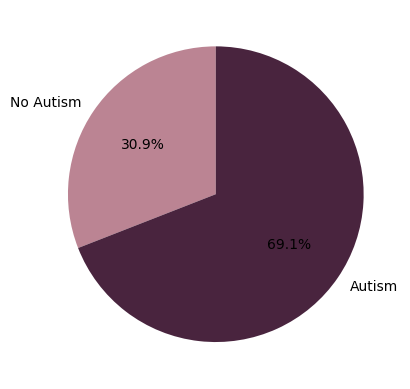

In [17]:
plt.pie(autism_data.groupby('Class/ASD Traits ').size(), labels=['No Autism', 'Autism'], autopct='%1.1f%%', startangle=90, colors=['#BB8493','#49243E'])
plt.show()

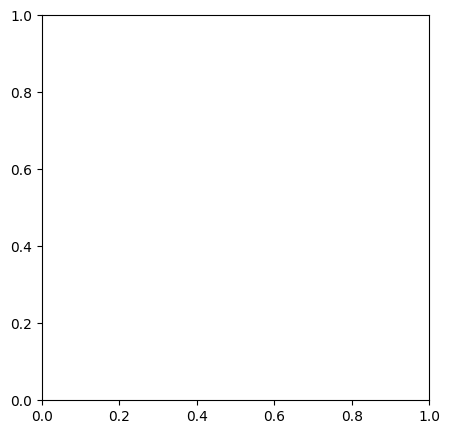

In [18]:
plt.figure(figsize=(5, 5))
# Nothing is showing because the data is categorical
sns.boxplot(data=autism_data[['Sex', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits ']], palette='viridis')
plt.show()

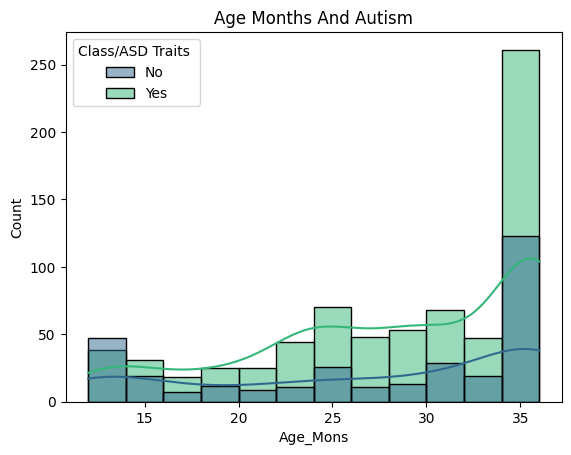

In [19]:
sns.histplot(data=autism_data, x='Age_Mons', hue='Class/ASD Traits ', kde=True, palette='viridis')
plt.title('Age Months And Autism')
plt.show()

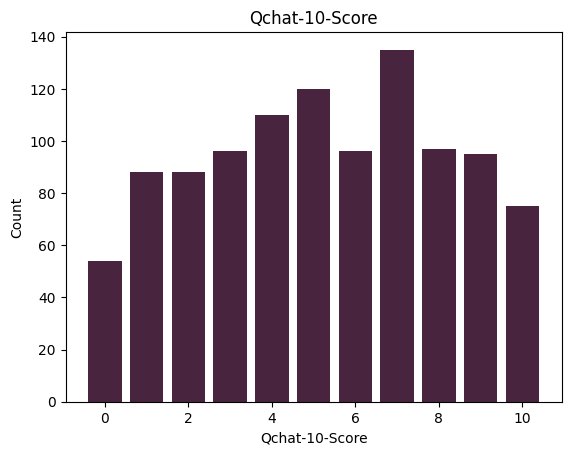

In [20]:
plt.bar(list(autism_data['Qchat-10-Score'].value_counts().keys()), list(autism_data['Qchat-10-Score'].value_counts()), color='#49243E')
plt.xlabel('Qchat-10-Score')
plt.ylabel('Count')
plt.title('Qchat-10-Score')
plt.show()

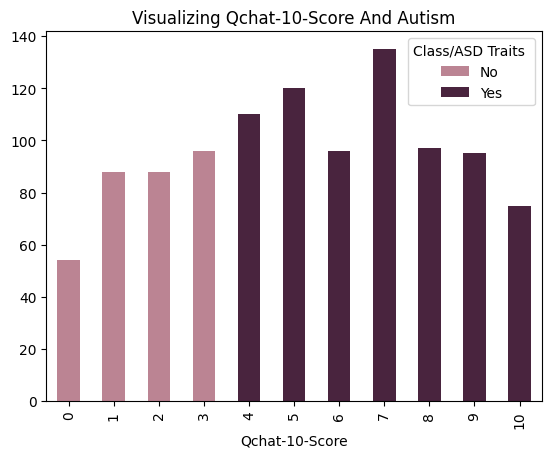

In [21]:
autism_data.groupby('Qchat-10-Score')['Class/ASD Traits '].value_counts().unstack().plot(kind='bar', stacked=True, color=['#BB8493','#49243E'])
plt.title('Visualizing Qchat-10-Score And Autism')
plt.show()

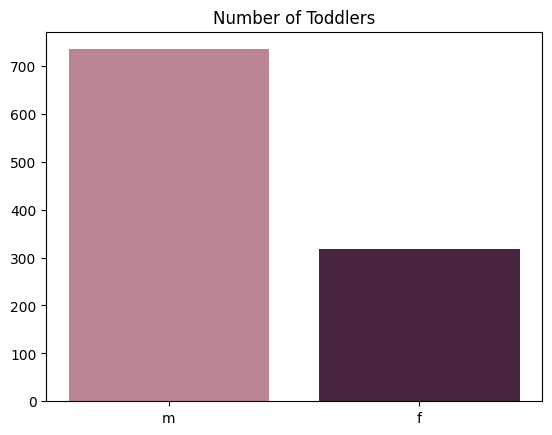

In [22]:
plt.bar(list(autism_data['Sex'].value_counts().keys()), list(autism_data['Sex'].value_counts()), color= ['#BB8493','#49243E'])
plt.title("Number of Toddlers")
plt.show()

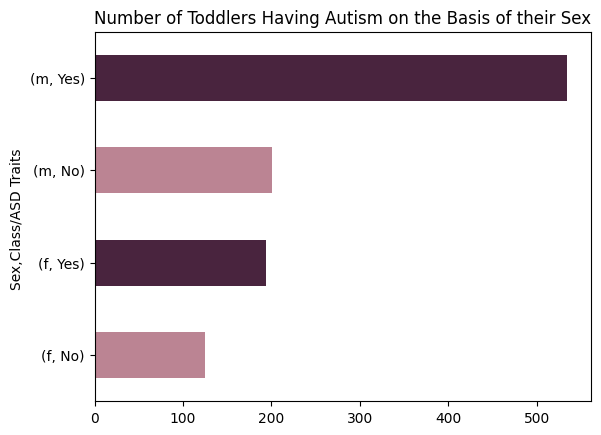

In [23]:
autism_data.groupby(['Sex', 'Class/ASD Traits ']).size().plot(kind='barh', color=['#BB8493','#49243E'])
plt.title('Number of Toddlers Having Autism on the Basis of their Sex')
plt.show()

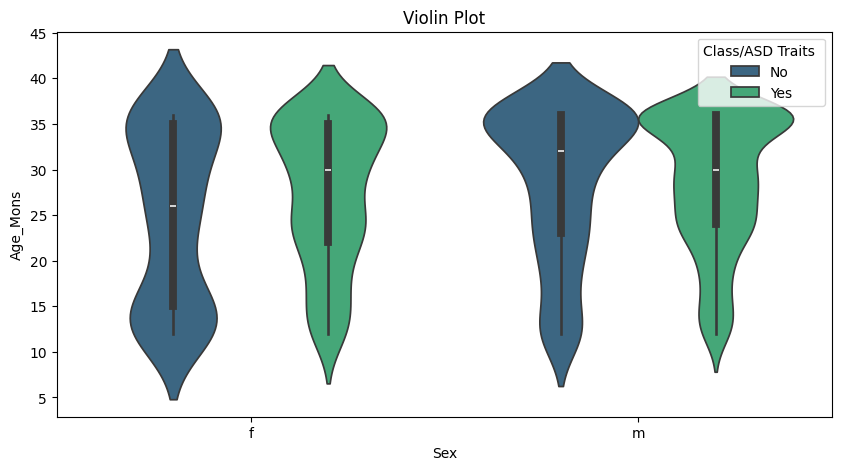

In [24]:
plt.figure(figsize=(10, 5))
sns.violinplot(x= "Sex", y= "Age_Mons", data=autism_data, hue= "Class/ASD Traits ", palette='viridis')
plt.title('Violin Plot')
plt.show()

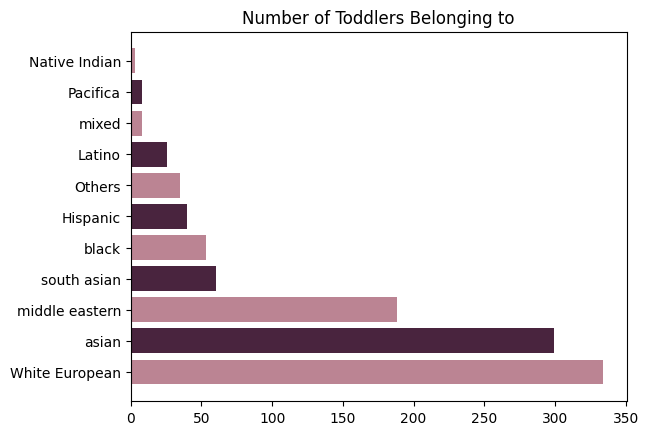

In [25]:
plt.barh(list(autism_data['Ethnicity'].value_counts().keys()), list(autism_data['Ethnicity'].value_counts()), color= ['#BB8493','#49243E'])
plt.title("Number of Toddlers Belonging to")
plt.show()

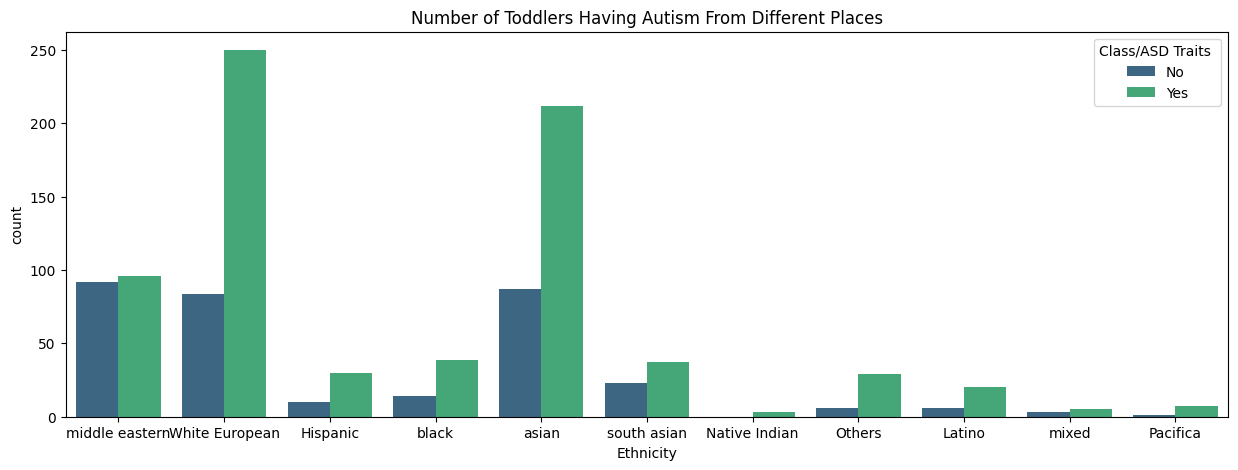

In [26]:
plt.figure(figsize=(15, 5))
sns.countplot(data=autism_data, x='Ethnicity', hue='Class/ASD Traits ', palette='viridis')
plt.title('Number of Toddlers Having Autism From Different Places')
plt.show()

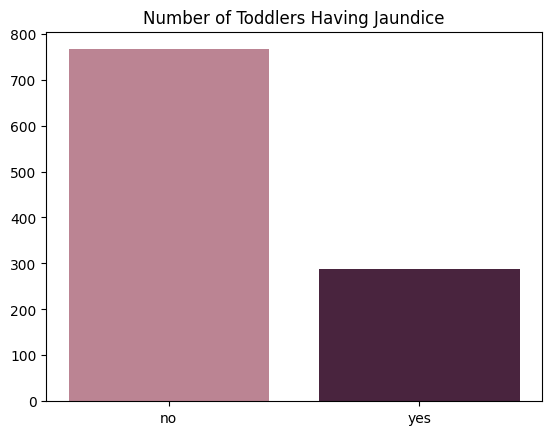

In [27]:
plt.bar(list(autism_data['Jaundice'].value_counts().keys()), list(autism_data['Jaundice'].value_counts()), color= ['#BB8493','#49243E'])
plt.title('Number of Toddlers Having Jaundice')
plt.show()

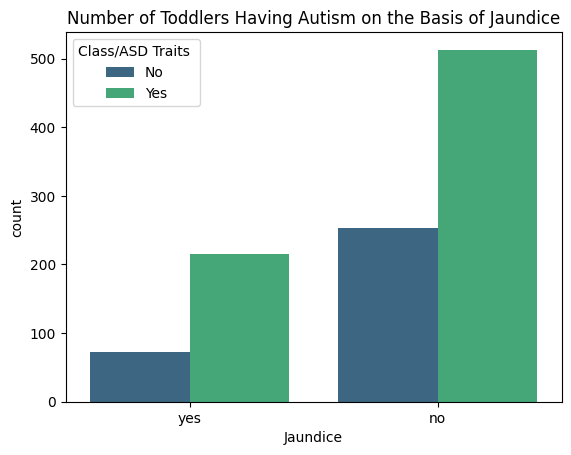

In [28]:
sns.countplot(data=autism_data, x='Jaundice', hue='Class/ASD Traits ', palette= 'viridis')
plt.title('Number of Toddlers Having Autism on the Basis of Jaundice')
plt.show()

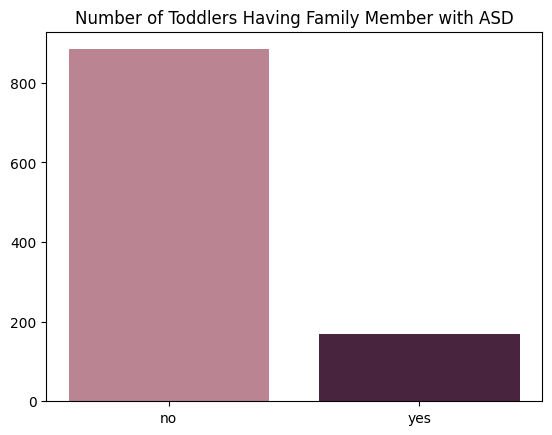

In [29]:
plt.bar(list(autism_data['Family_mem_with_ASD'].value_counts().keys()), list(autism_data['Family_mem_with_ASD'].value_counts()), color= ['#BB8493','#49243E'])
plt.title('Number of Toddlers Having Family Member with ASD')
plt.show()

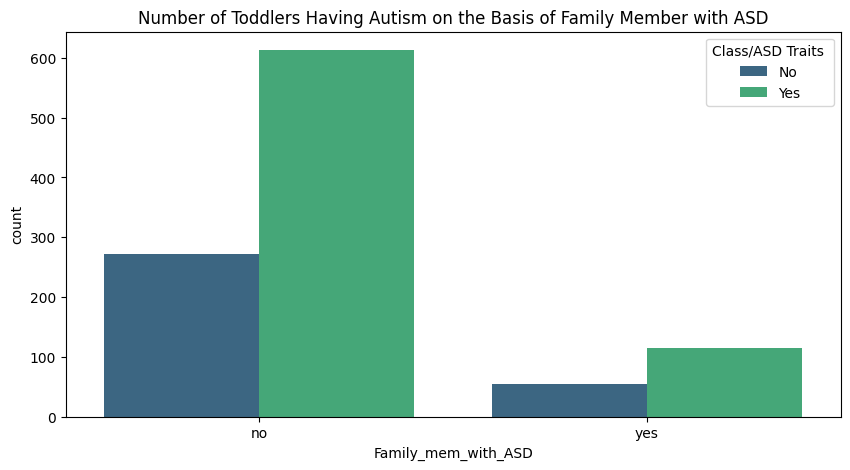

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(data=autism_data, x='Family_mem_with_ASD', hue='Class/ASD Traits ', palette='viridis')
plt.title('Number of Toddlers Having Autism on the Basis of Family Member with ASD')
plt.show()

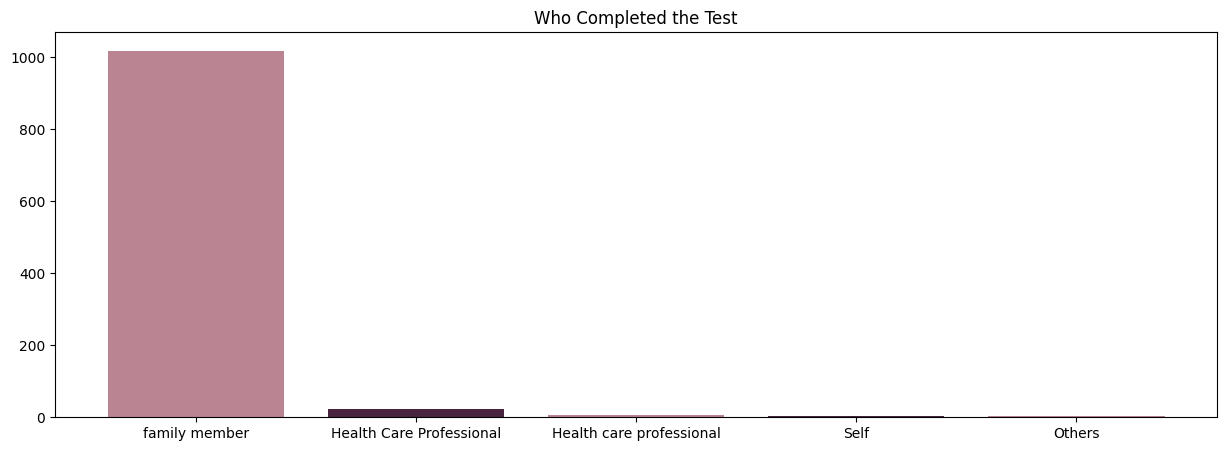

In [31]:
plt.figure(figsize=(15, 5))
plt.bar(list(autism_data['Who completed the test'].value_counts().keys()), list(autism_data['Who completed the test'].value_counts()), color= ['#BB8493','#49243E'])
plt.title('Who Completed the Test')
plt.show()

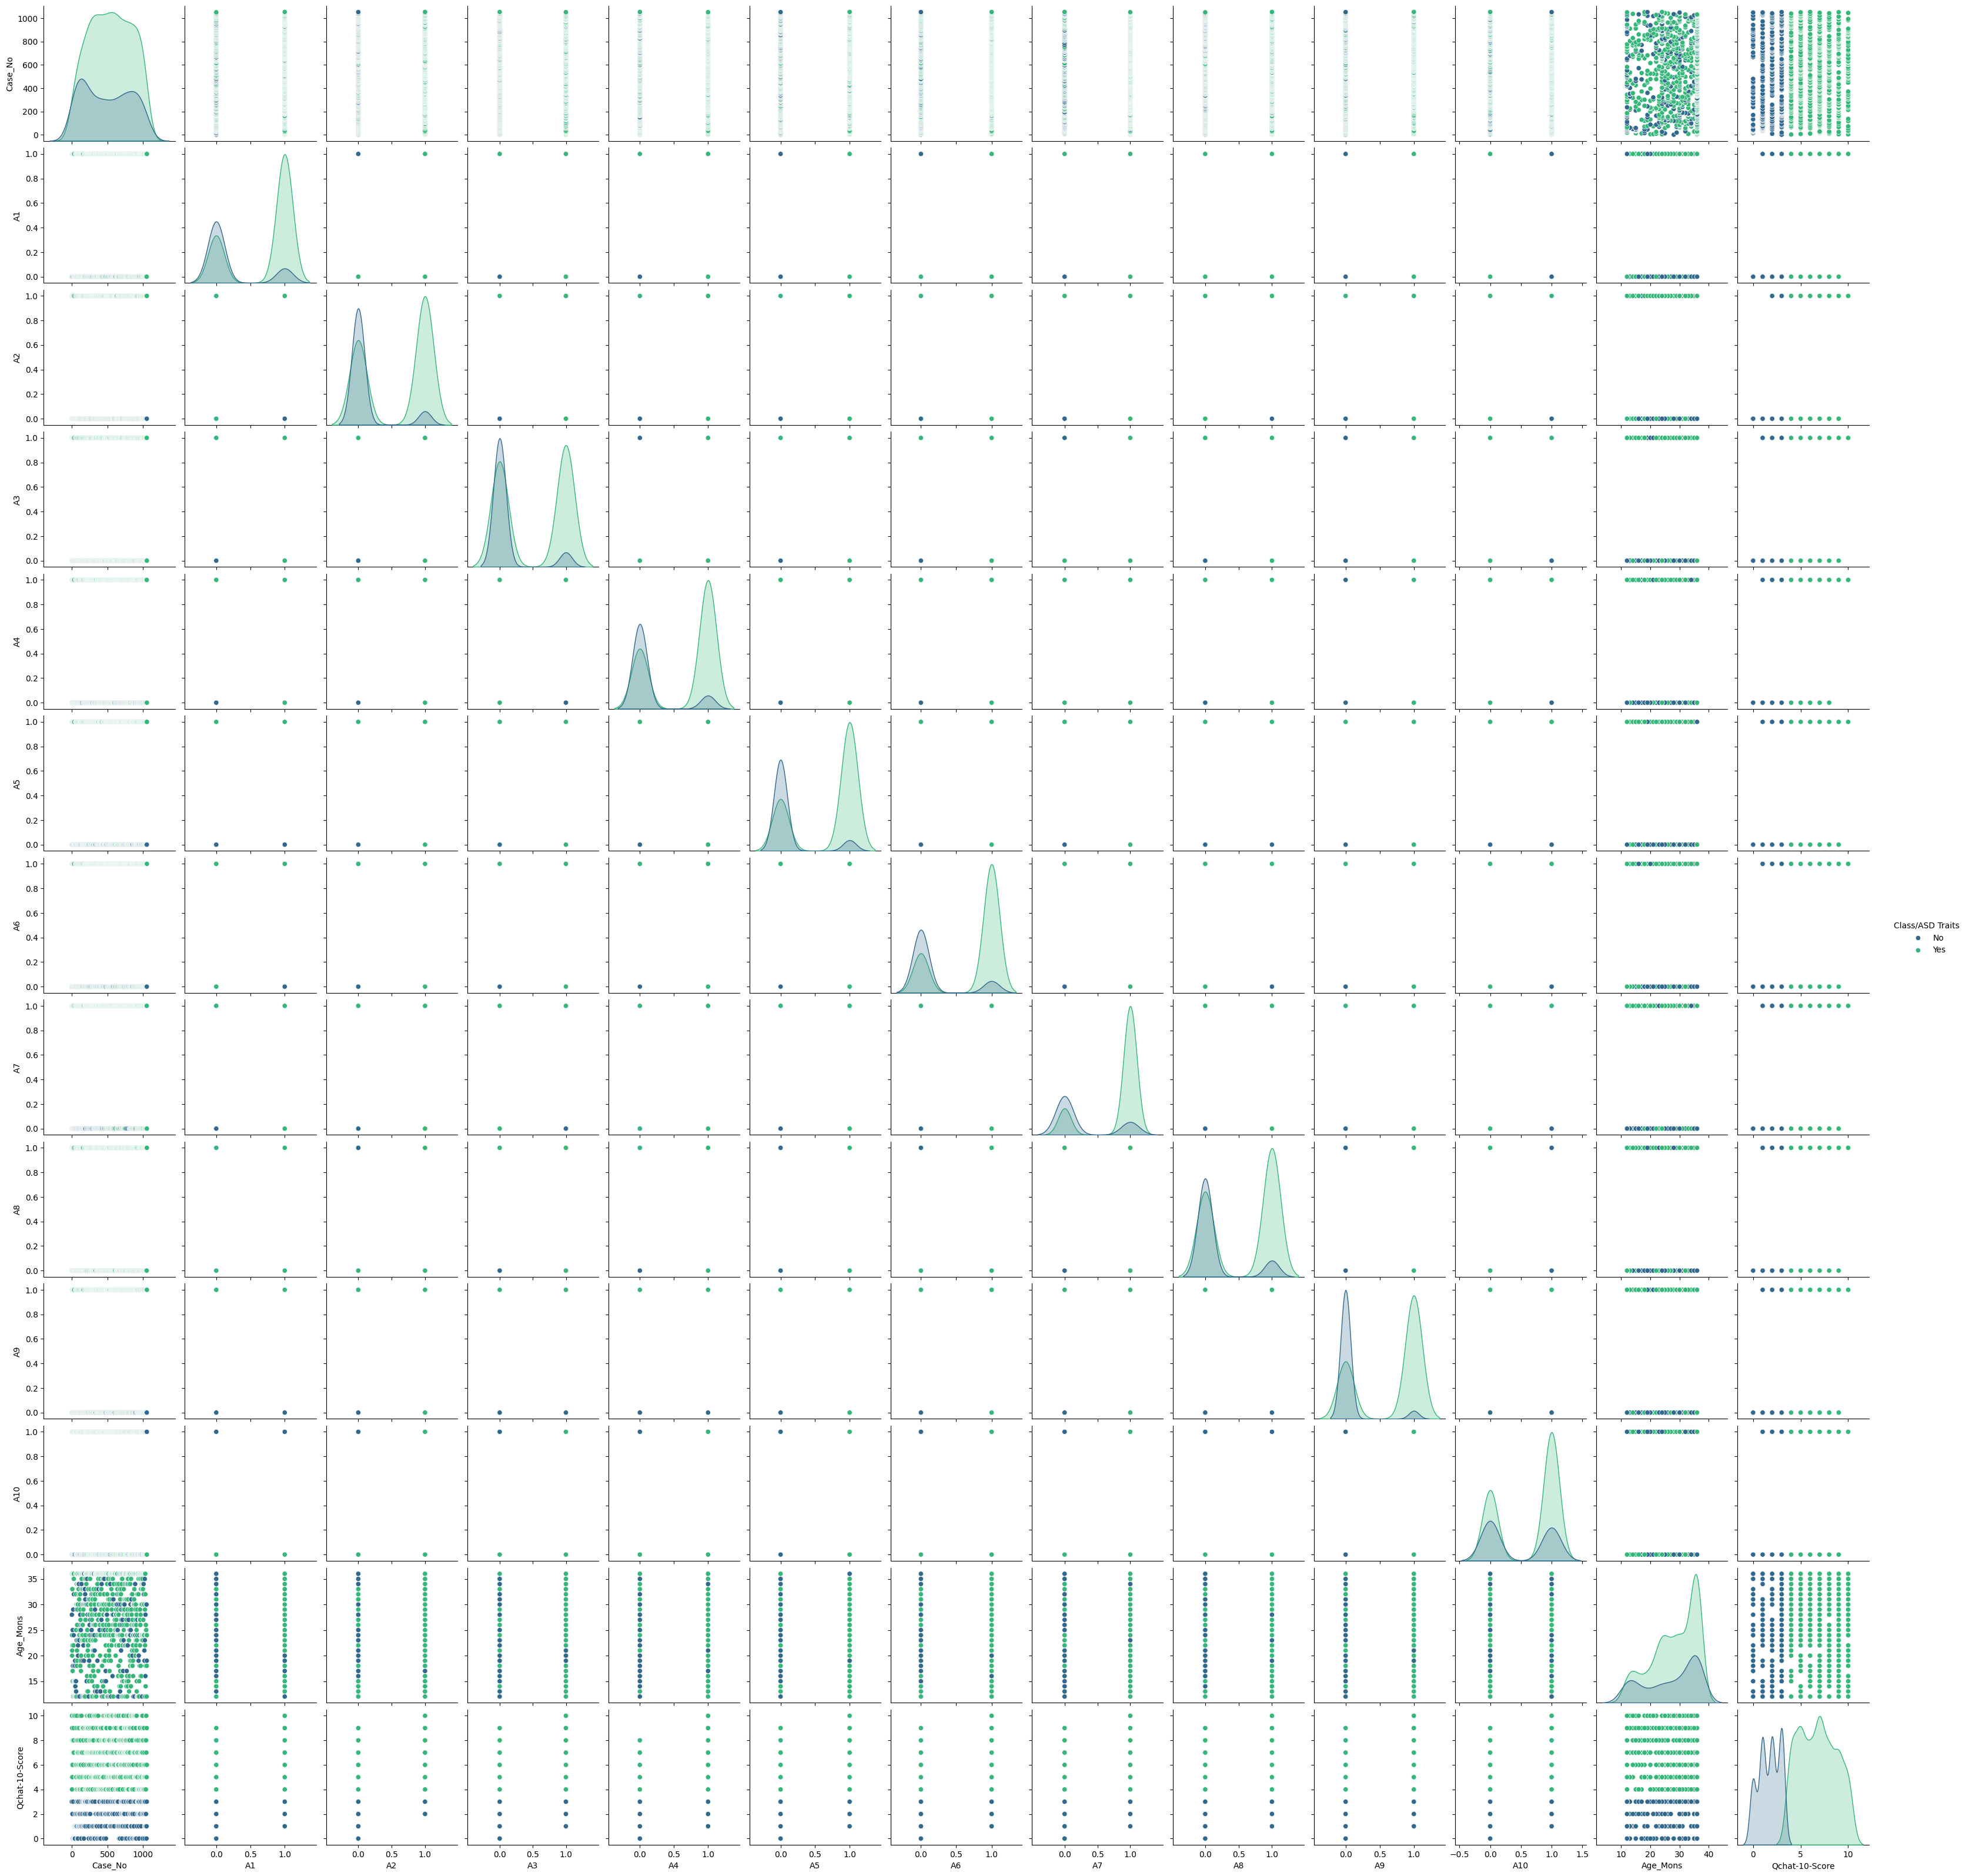

In [32]:
sns.pairplot(autism_data, hue='Class/ASD Traits ', palette='viridis')

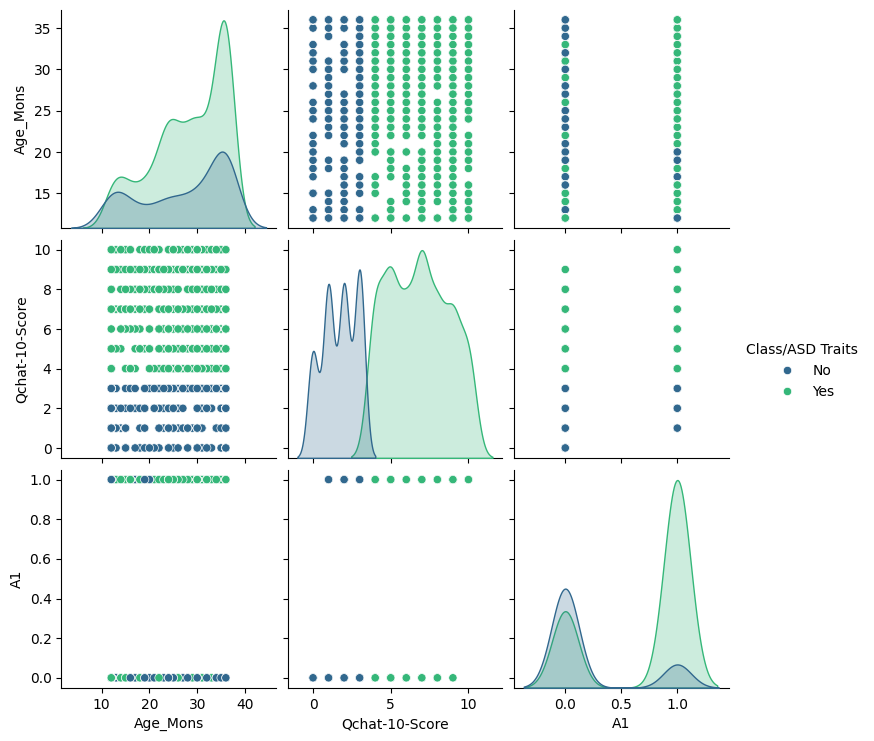

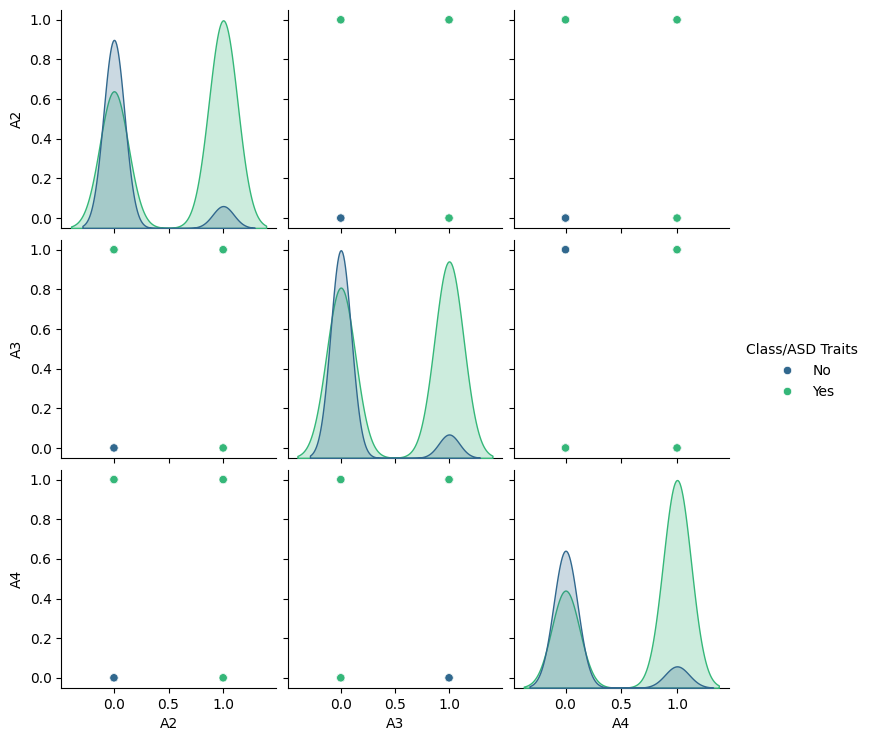

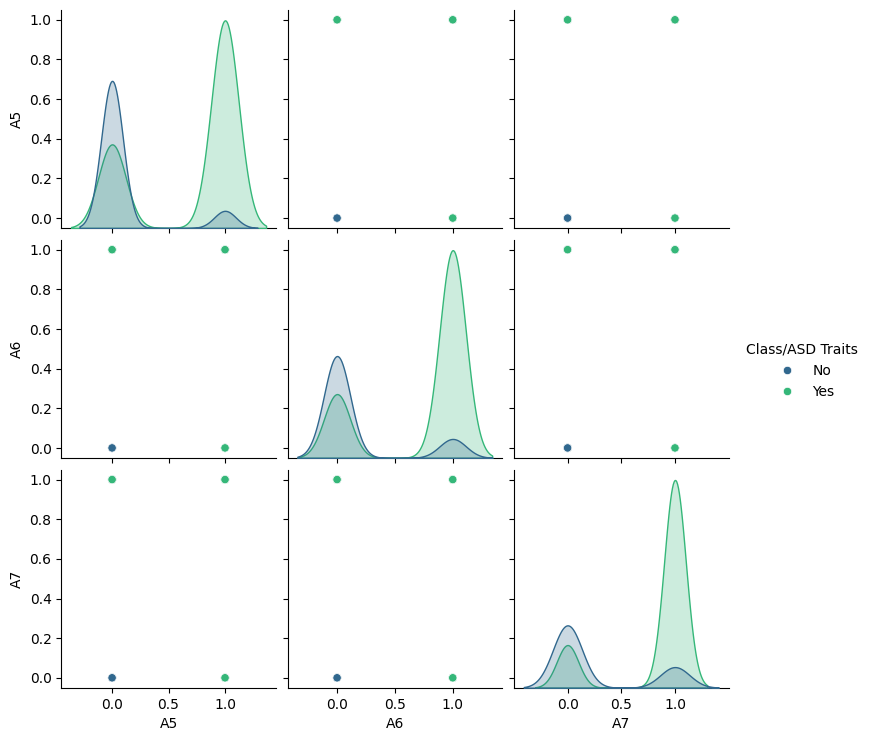

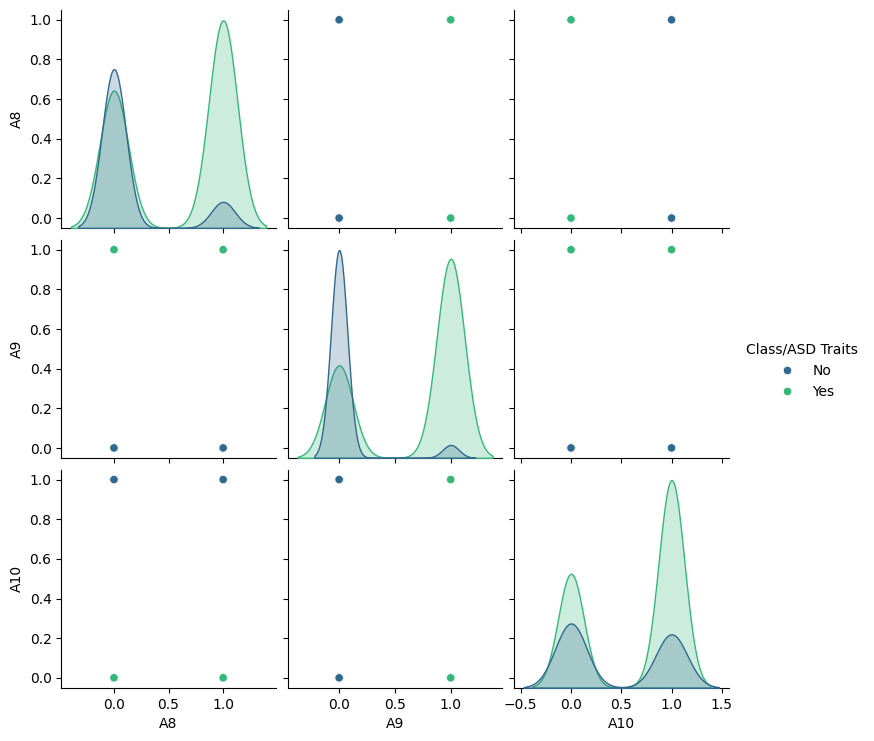

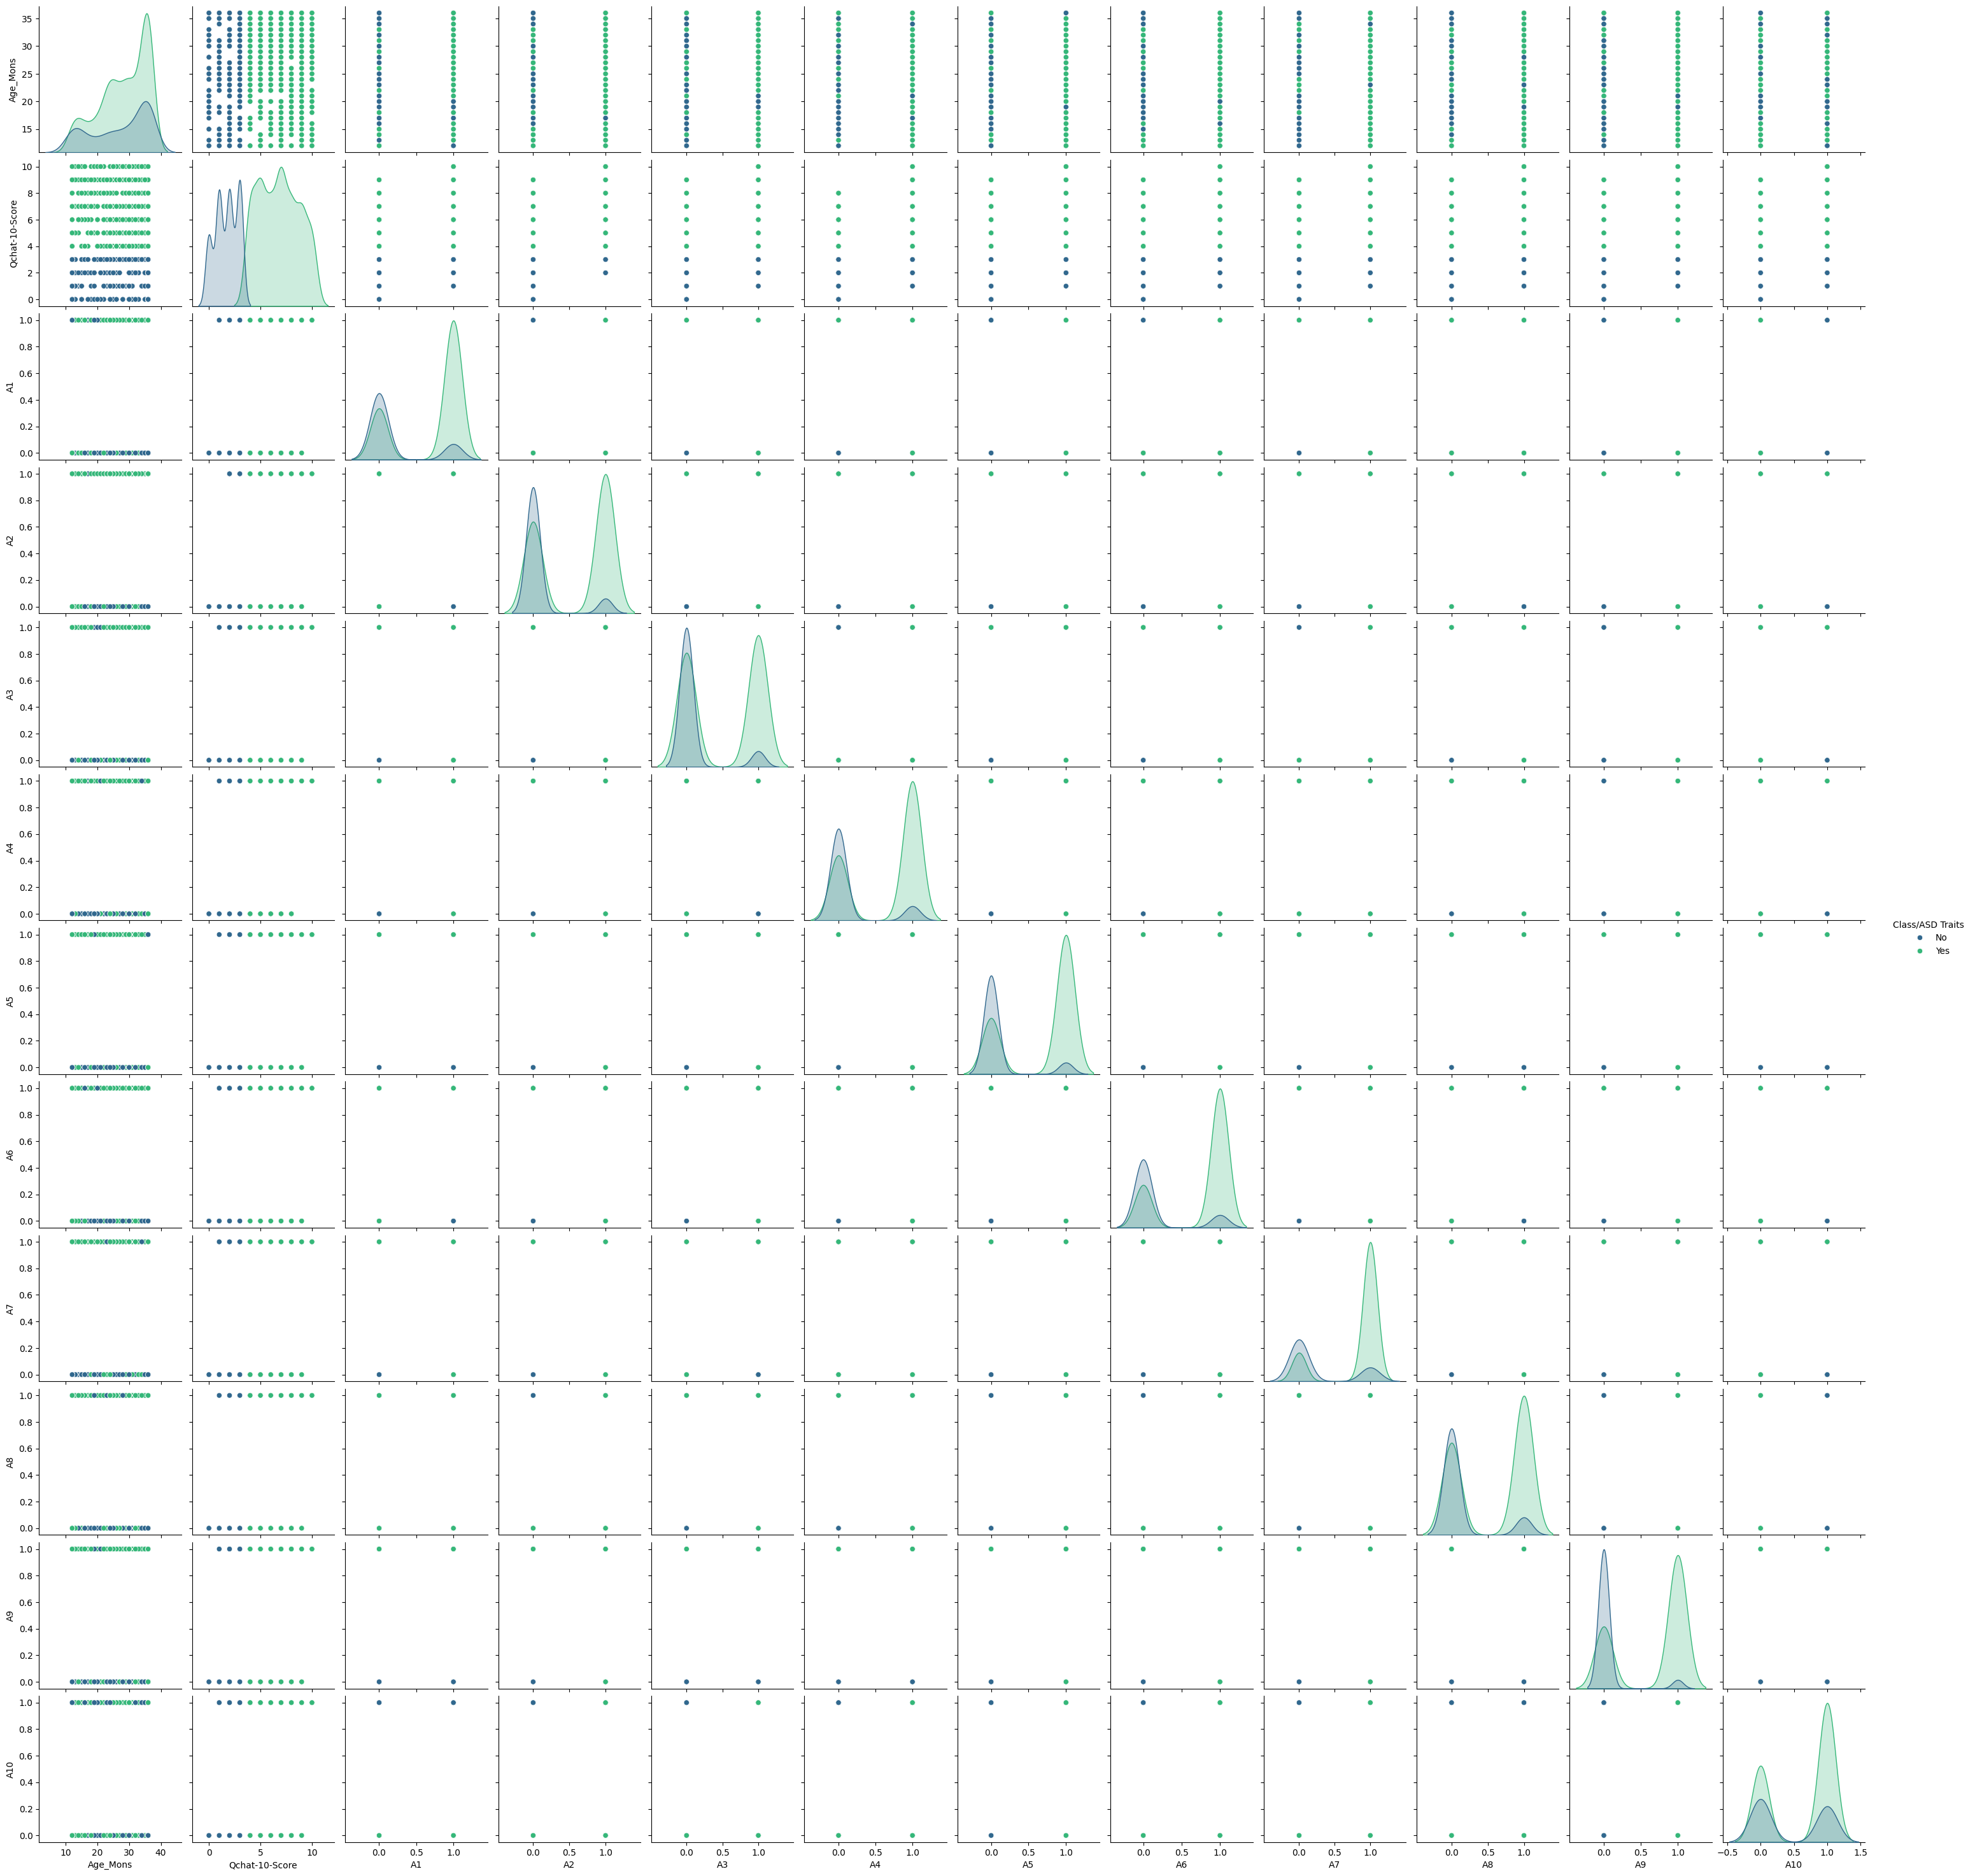

In [33]:
def pair_plot(data, columns, target_column, palette='viridis'):
    sns.pairplot(data[columns + [target_column]], hue=target_column, palette=palette)
    plt.show()

pair_plot(autism_data, ['Age_Mons', 'Qchat-10-Score', 'A1'], 'Class/ASD Traits ')
pair_plot(autism_data, ['A2', 'A3', 'A4'], 'Class/ASD Traits ')
pair_plot(autism_data, ['A5', 'A6', 'A7'], 'Class/ASD Traits ')
pair_plot(autism_data, ['A8', 'A9', 'A10'], 'Class/ASD Traits ')
pair_plot(autism_data, ['Age_Mons', 'Qchat-10-Score', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'], 'Class/ASD Traits ')

<h3>Cross-Tabulation</h3>

In [34]:
cross_tab = pd.crosstab(index=autism_data['Age_Mons'], columns=autism_data['Class/ASD Traits '])

cross_tab

Class/ASD Traits,No,Yes
Age_Mons,,
12,37,30
13,10,8
14,3,16
15,16,15
16,2,11
17,5,7
18,4,12
19,8,13
20,4,17


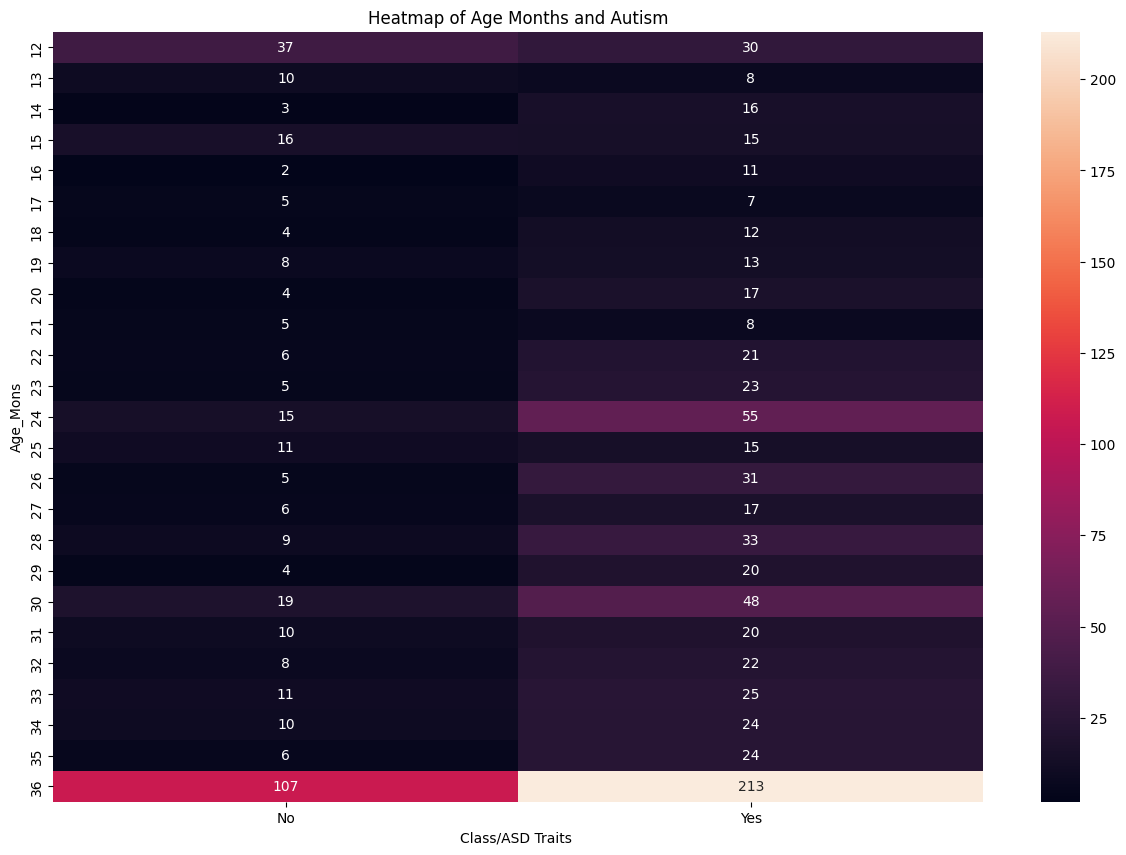

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Heatmap of Age Months and Autism')
plt.show()

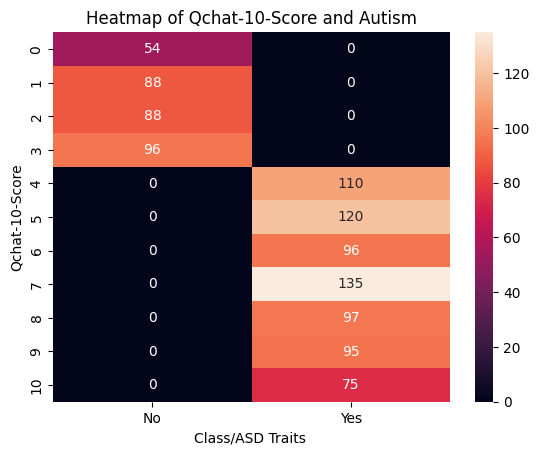

In [36]:
cross_tab = pd.crosstab(index=autism_data['Qchat-10-Score'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Heatmap of Qchat-10-Score and Autism')
plt.xlabel('Class/ASD Traits ')
plt.ylabel('Qchat-10-Score')
plt.show()

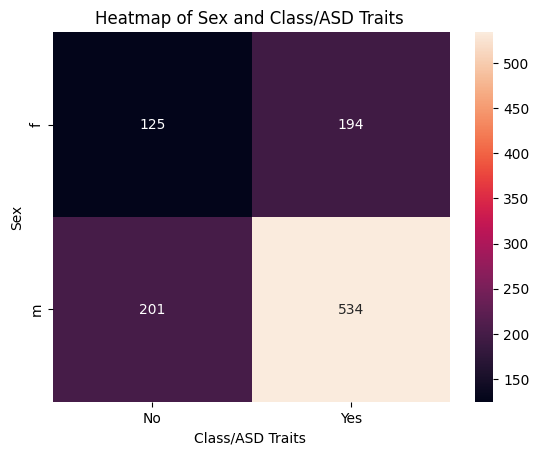

In [37]:
cross_tab = pd.crosstab(index=autism_data['Sex'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Heatmap of Sex and Class/ASD Traits ')
plt.xlabel('Class/ASD Traits ')
plt.ylabel('Sex')
plt.show()

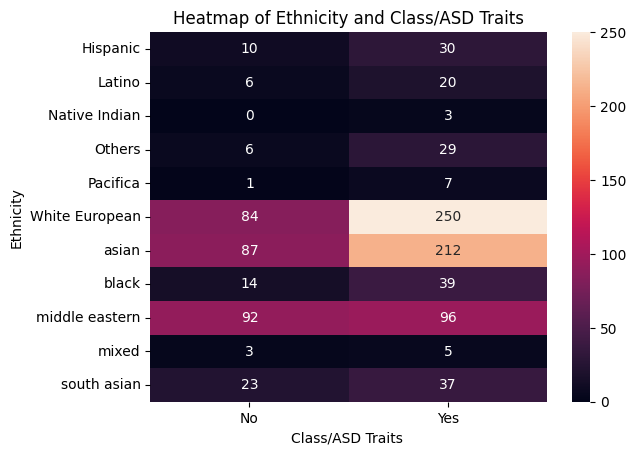

In [38]:
cross_tab = pd.crosstab(index=autism_data['Ethnicity'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Heatmap of Ethnicity and Class/ASD Traits')
plt.xlabel('Class/ASD Traits ')
plt.ylabel('Ethnicity')
plt.show()

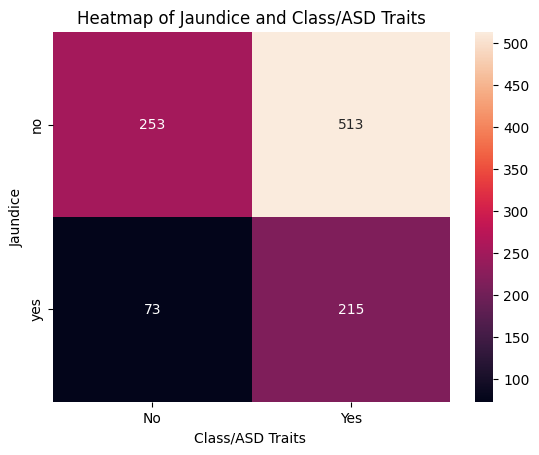

In [39]:
cross_tab = pd.crosstab(index=autism_data['Jaundice'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Heatmap of Jaundice and Class/ASD Traits')
plt.xlabel('Class/ASD Traits ')
plt.ylabel('Jaundice')
plt.show()

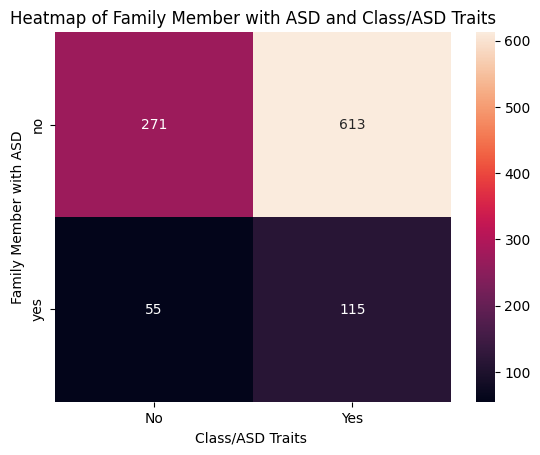

In [40]:
cross_tab = pd.crosstab(index=autism_data['Family_mem_with_ASD'], columns=autism_data['Class/ASD Traits '])

sns.heatmap(cross_tab, annot=True, fmt='d')
plt.title('Heatmap of Family Member with ASD and Class/ASD Traits')
plt.xlabel('Class/ASD Traits ')
plt.ylabel('Family Member with ASD')
plt.show()

<h3>Box Plot</h3>

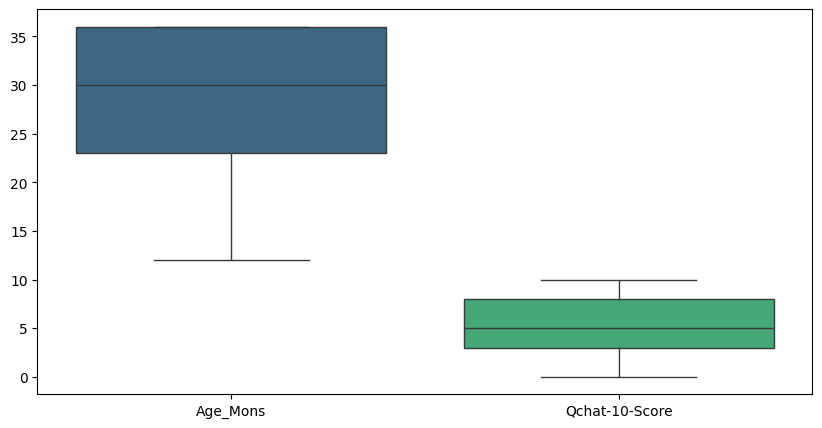

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=autism_data[['Age_Mons', 'Qchat-10-Score']], palette='viridis')
plt.show()

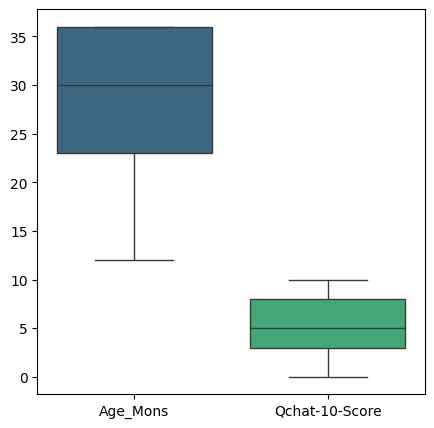

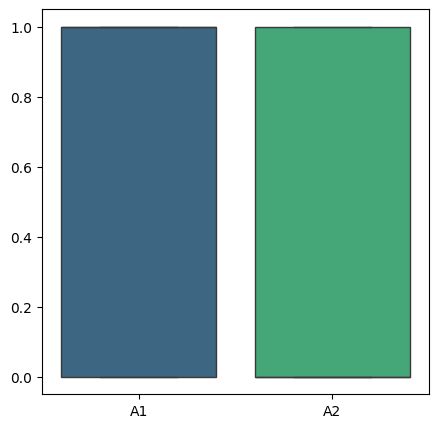

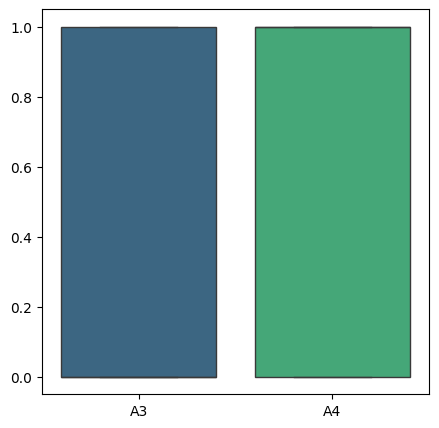

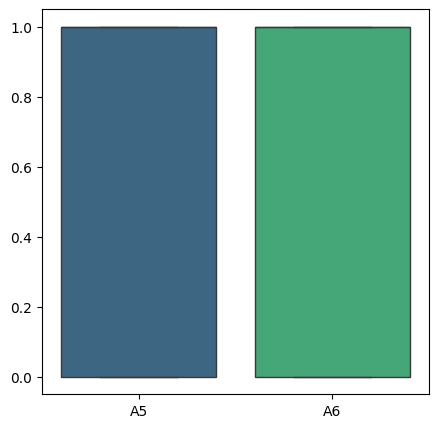

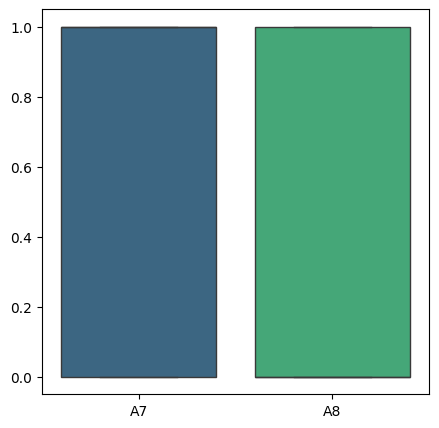

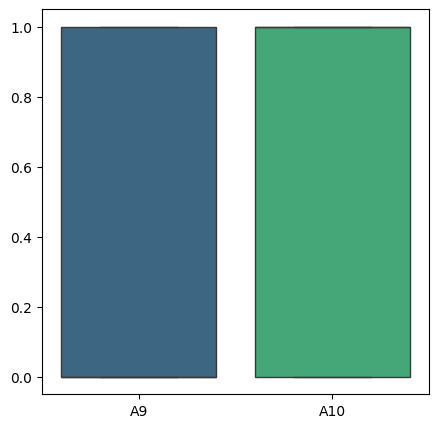

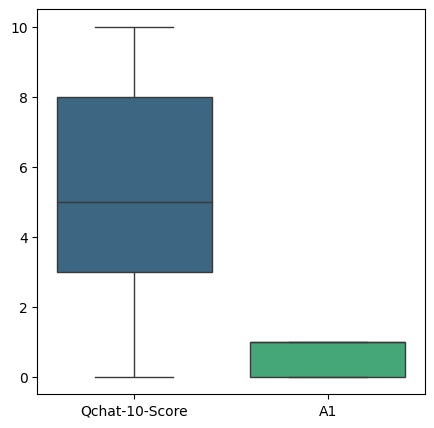

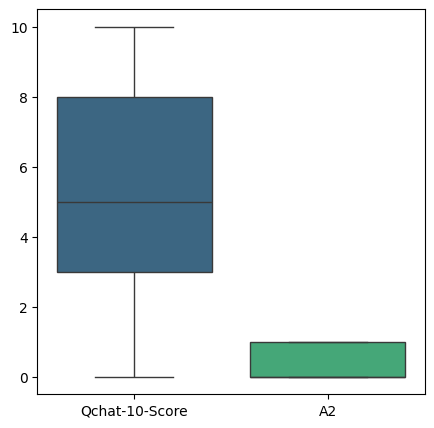

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plots(data, column1, column2):
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=data[[column1, column2]], palette='viridis')
    plt.show()

box_plots(autism_data, 'Age_Mons', 'Qchat-10-Score')
box_plots(autism_data, 'A1', 'A2')
box_plots(autism_data, 'A3', 'A4')
box_plots(autism_data, 'A5', 'A6')
box_plots(autism_data, 'A7', 'A8')
box_plots(autism_data, 'A9', 'A10')
box_plots(autism_data, 'Qchat-10-Score', 'A1')
box_plots(autism_data, 'Qchat-10-Score', 'A2')


In [43]:
# Checking for outliers using IQR
# Creating a function named count_outliers_iqr that takes a column as input and returns the number of outliers in the column
def count_outliers_iqr(column):
    # The IQR (Interquartile Range) is the range between the first quartile (Q1) and the third quartile (Q3)
    # The IQR is used to identify outliers in the data
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    # The upper threshold is calculated as Q3 + 1.5 * IQR
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    # The number of outliers is calculated as the number of data points that are greater than the upperbound or less than the lowerbound
    num_outliers = sum((column > upper_bound) | (column < lower_bound))
    return num_outliers

for col in ['Age_Mons', 'Qchat-10-Score' , 'A1' , 'A2' , 'A3' , 'A4' , 'A5' , 'A6' , 'A7' , 'A8' , 'A9' , 'A10']:
    num_outliers = count_outliers_iqr(autism_data[col])
    print(f"Number of outliers in {col} : {num_outliers}")

# Since there are no outliers in the data, we can proceed with the analysis as there are no data points that are significantly different from other data points making the data consistent and reliable.

Number of outliers in Age_Mons : 0
Number of outliers in Qchat-10-Score : 0
Number of outliers in A1 : 0
Number of outliers in A2 : 0
Number of outliers in A3 : 0
Number of outliers in A4 : 0
Number of outliers in A5 : 0
Number of outliers in A6 : 0
Number of outliers in A7 : 0
Number of outliers in A8 : 0
Number of outliers in A9 : 0
Number of outliers in A10 : 0


From Above Box plots and IQR Theorem we can see there are no outliers in this dataset.

<h3>Feature Extraction</h3>

In [44]:
autism_data.drop('Case_No', axis=1, inplace=True)

In [45]:
autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [46]:
# Feature Engineering
# Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

def convertAge(age):
    if age <= 12:
        return '0-12 months'
    elif age > 12 and age <= 24:
        return '13-24 months'
    elif age > 24 and age <= 36:
        return '25-36 months'
    elif age > 36 and age <= 48:
        return '37-48 months' 

autism_data['Age_Group'] = autism_data['Age_Mons'].apply(convertAge)

In [47]:
autism_data['Age_Group'].value_counts()

Age_Group
25-36 months    698
13-24 months    289
0-12 months      67
Name: count, dtype: int64

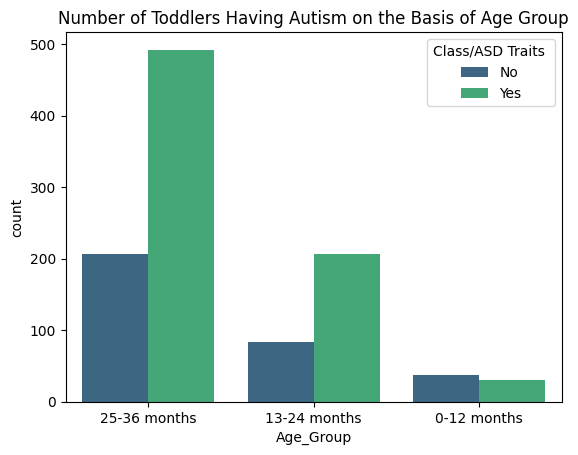

In [48]:
sns.countplot(data=autism_data, x='Age_Group', hue='Class/ASD Traits ', palette='viridis')
plt.title('Number of Toddlers Having Autism on the Basis of Age Group')
plt.show()

In [49]:
# Lowest Possible Age for Autism : 0 - 12 months
# Highest Possible Age for Autism : 37 - 48 months

# Encoding Categoircal Columns
# Encoding is the process of converting the categorical data into numerical data
autism_data['Jaundice'] = autism_data['Jaundice'].map({'yes': 1, 'no': 0})
autism_data['Family_mem_with_ASD'] = autism_data['Family_mem_with_ASD'].map({'yes': 1, 'no': 0})

autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age_Group
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,1,0,family member,No,25-36 months
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,1,0,family member,Yes,25-36 months
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,1,0,family member,Yes,25-36 months
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,0,0,family member,Yes,13-24 months
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,0,1,family member,Yes,13-24 months


<h3>Data Cleaning</h3>

In [50]:
autism_data.duplicated().sum()

79

In [51]:
autism_data.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
Age_Group                 0
dtype: int64

After thoroughly examining our dataset, we've confirmed that it's clean and free from any outliers or missing values. We've done this by carefully looking at box plots and applying the IQR Theorem to detect outliers. Additionally, we've checked for any null values and found none. So, we can confidently say that our dataset is in good shape

<h3>Correlation Matrix</h3>

<Axes: >

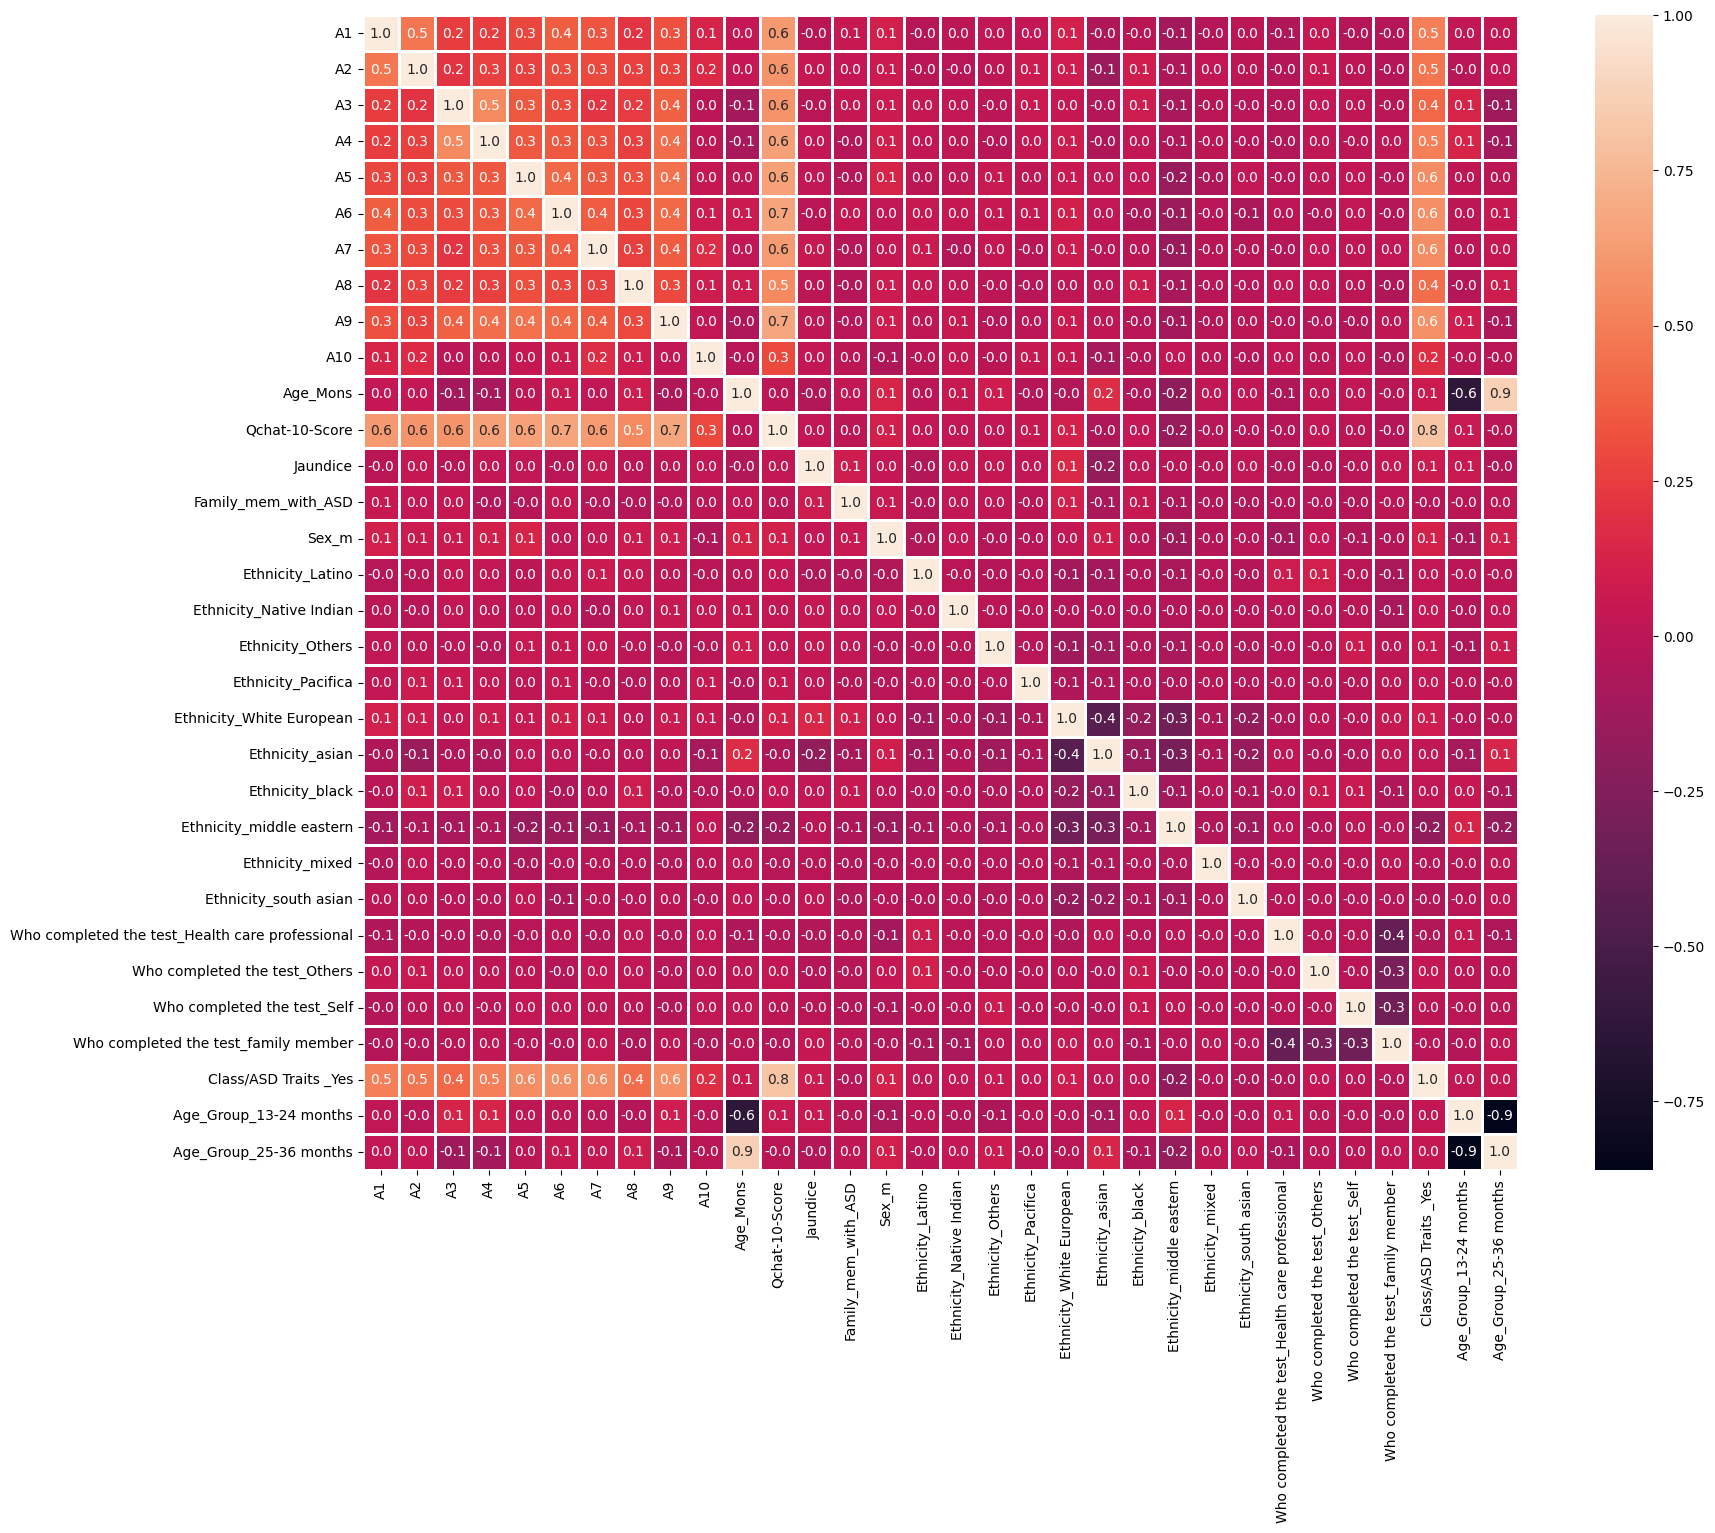

In [52]:
# Correlation Matrix for full Dataset
autism_data = pd.get_dummies(autism_data, drop_first=True)
correlation_matrix = autism_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f' , square=True, linewidths=1)

In [53]:
autism_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes,Age_Group_13-24 months,Age_Group_25-36 months
0,0,0,0,0,0,0,1,1,0,1,...,True,False,False,False,False,False,True,False,False,True
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,True,True,False,True
2,1,0,0,0,0,0,1,1,0,1,...,True,False,False,False,False,False,True,True,False,True
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,True,True,False
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,True,True,False
